# Regression Techs

### Data Loading


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import numpy as np
import joblib


In [2]:
def loaddata():
    data = pd.read_csv('./data/kc_house_data.csv', na_values = '?')
    return data

In [3]:
data = loaddata()

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# df[['cc']] = df[['cc']].apply(lambda col:pd.Categorical(col).codes)
# df[list_of_columns] = df[list_of_columns].apply(lambda col:pd.Categorical(col).codes)
# df[['cc']] = df[['cc']].apply(lambda col:pd.Categorical(col).codes).replace(-1,np.nan)


/home/arun/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

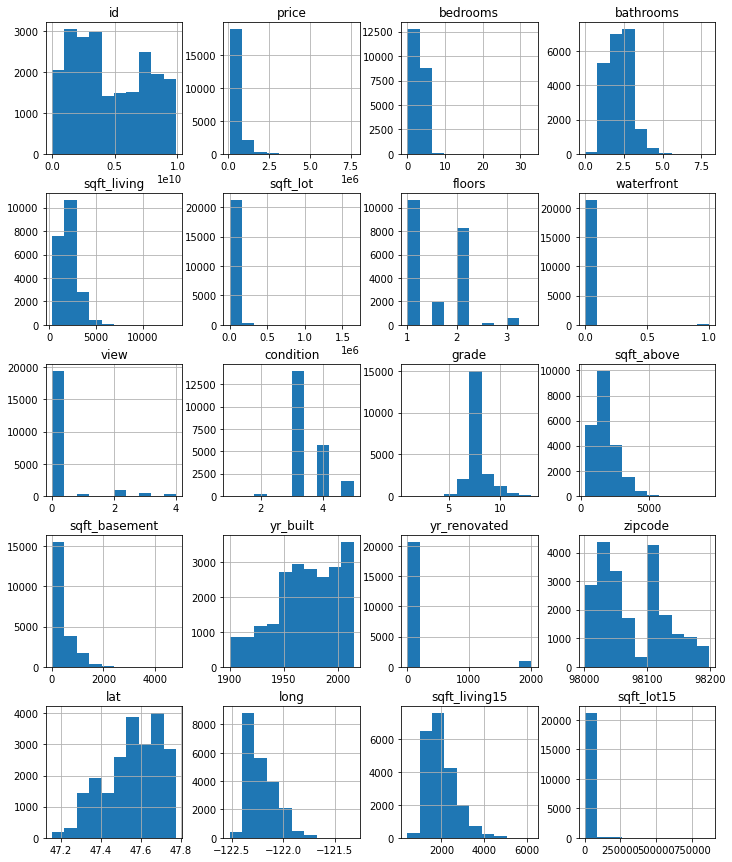

In [7]:

data.hist(figsize=(12,15))

In [51]:
corr = data.corr()
values = pd.DataFrame(corr["price"].sort_values(ascending=False))
print(values)
# to_drop = [column for column in values.columns if any(values['price'] > 0.0)]
# print(to_drop)
# values = pd.DataFrame(corr["price"].sort_values(ascending=False))
# values = values[values['price'] > 0]
# values
# values = corr["price"].sort_values(ascending=False)
# values = values[values > 0.00]
# values

                  price
price          1.000000
sqft_living    0.702035
grade          0.667434
sqft_above     0.605567
sqft_living15  0.585379
bathrooms      0.525138
view           0.397293
sqft_basement  0.323816
bedrooms       0.308350
lat            0.307003
waterfront     0.266369
floors         0.256794
yr_renovated   0.126434
sqft_lot       0.089661
sqft_lot15     0.082447
yr_built       0.054012
condition      0.036362
long           0.021626
id            -0.016762
zipcode       -0.053203


In [11]:
# cormat2= data.corr()
# #cormat2.columns
# #print(cormat2["price"].sort_values(ascending=False))
# # values = cormat["price"].sort_values(ascending=False)
# # values = values[values > 0.00]
# # values
# to_drop = [column for column in cormat2.columns if any(cormat2[column] < 0.0)]
# to_drop

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing  import LabelEncoder


def fun_remove_object_cols(df):
    df = df.select_dtypes(exclude= 'object')
    return df

def fillna(df):
    df = df.fillna(0)
    return df 

def preproces(df):
    
    ##droping negatively correalted colns with target variablt
    df.corr()['SalePrice'].sort_values(ascending = False)
    x =pd.DataFrame(df.corr()['SalePrice'].sort_values(ascending = False))
    to_drop  = x[x['SalePrice'] <  0].index
    to_drop.tolist()    
    df_1 = df.drop(to_drop, axis =1)
        
    ###remove colms having more than 75% Null values 
    X=  pd.DataFrame(df_1.isnull().sum()/df_1.shape[0] * 100, columns=['Missing_count'])
    to_drop_1  = X[X['Missing_count'] > 75 ].index
    to_drop_1.tolist()
    df_2 = df_1.drop(to_drop_1, axis =1)
    
    ###lets do label encoding
    le=LabelEncoder()
    df_processed = df_2.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
    
    return df_processed



In [65]:
def remove_neg_correlated(df):
    corr =  df.corr()
    to_drop = [column for column in corr.columns if any(corr['price'] > 0.0)]
    df = df[to_drop]
    return df
    

In [67]:
df = remove_neg_correlated(data)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [153]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


linreg = LinearRegression()
l2 = Ridge(alpha=1.0, normalize=True)
l1 = Lasso(alpha=1.0, normalize=True)
decision = DecisionTreeRegressor(random_state=0)
regressor = RandomForestRegressor(random_state=0)

In [77]:
def splitdata(df):
    y=df['price']
    X=df.drop(['price'],axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
    return X_train, X_test, y_train, y_test

In [159]:
def crossval(classifier, X, y):
    cv =  KFold(5)
    return cross_val_score(classifier, X, y, cv=cv)


def model_train(classifier, X_train, y_train, X_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred


def initialise_models():
    linreg = LinearRegression()
    l2 = Ridge(alpha=1.0, normalize=True)
    l1 = Lasso(alpha=1.0, normalize=True)
    decision = DecisionTreeRegressor(random_state=0)
    regressor = RandomForestRegressor(random_state=0)
    return linreg, l2, l1, decision, regressor


rscore = []
cls = []
def model_evalution(y_test, y_pred, classifier):
    
   
    
    MAE = np.floor(mean_absolute_error(y_test, y_pred))
    MSE = np.floor(mean_squared_error(y_test, y_pred))
    RMSE = np.floor(np.sqrt(mean_squared_error(y_test, y_pred)))
    Rsquare = r2_score(y_test, y_pred)
    print("Root Mean Squared Error", RMSE)
    print("R Sqaure",Rsquare )
    
    cls.append(classifier)
    rscore.append(Rsquare)
    
    d = dict(zip(cls, rscore))
    #print(d)
    #results_df = to_result_df(classifier, rmsle, MAE, MSE, RMSE, results_df)
    
    return d

def bestalgo(metrics):
    newmetric= dict(sorted(metrics.items(), key=lambda item: item[1], reverse=True))
    # Get first key-value pair of the dictionary
    first_pair = next(iter((newmetric.items())) )
    bestalgo =  first_pair[0]
    rscore = first_pair[1]
    return bestalgo, rscore
 
    

In [168]:
newmetric= dict(sorted(metrics.items(), key=lambda item: item[1], reverse=True))
newmetric
first_pair = next(iter((newmetric.items())) )
first_pair

(RandomForestRegressor(random_state=0), 0.8751742154361986)

In [140]:
data = fun_remove_object_cols(data)

In [141]:

X_train, X_test, y_train, y_test = splitdata(data)

In [163]:
algos = [linreg, l1, l2, decision, regressor]

In [164]:
y=df['price']
X=df.drop(['price'],axis=1)
for i in algos:
    print(crossval(i, X, y))

/home/arun/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/arun/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.69580117 0.69093966 0.69296069 0.70796197 0.6855907 ]
[0.69572154 0.6908599  0.69300502 0.70804338 0.68575323]
[0.61640432 0.6138403  0.64012113 0.65465376 0.62110138]


/home/arun/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/arun/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.78303759 0.72572224 0.71962971 0.74413723 0.73343097]


/home/arun/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[0.87596544 0.8735419  0.86998841 0.86824204 0.87544959]


In [151]:

for algo in algos:
    print(algo)

    
    y_pred = model_train(algo, X_train, y_train, X_test)
    metrics = model_evalution(y_test, y_pred, algo)
bestalgo, rscore = bestalgo(metrics)
print(bestalgo, rscore)
   
    
    

LinearRegression()
Root Mean Squared Error 186325.0
R Sqaure 0.7052711244570644
Lasso(normalize=True)
Root Mean Squared Error 186303.0
R Sqaure 0.7053400858748826
Ridge(normalize=True)
Root Mean Squared Error 203653.0
R Sqaure 0.6479044790189272
DecisionTreeRegressor(random_state=0)
Root Mean Squared Error 181028.0
R Sqaure 0.7217918398843961
RandomForestRegressor(random_state=0)
Root Mean Squared Error 121258.0
R Sqaure 0.8751742154361986
RandomForestRegressor(random_state=0) 0.8751742154361986


# Classificatipon


In [2]:
def loaddata():
    data = pd.read_csv('./data/churn.csv', na_values = '?')
    return data

In [3]:
dfnew = loaddata()
dfnew

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4996,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,yes
4997,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,no
4998,DC,109,area_code_510,no,no,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,no


In [4]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [5]:
dfnew.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
df1 = dfnew.select_dtypes(include=['object'])
df1.columns
listcols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [7]:
dfnew[listcols] = dfnew[listcols].apply(lambda col:pd.Categorical(col).codes)

In [8]:
dfnew

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,1,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,1,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,2,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


/home/arun/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'area_code'}>,
        <AxesSubplot:title={'center':'international_plan'}>],
       [<AxesSubplot:title={'center':'voice_mail_plan'}>,
        <AxesSubplot:title={'center':'number_vmail_messages'}>,
        <AxesSubplot:title={'center':'total_day_minutes'}>,
        <AxesSubplot:title={'center':'total_day_calls'}>],
       [<AxesSubplot:title={'center':'total_day_charge'}>,
        <AxesSubplot:title={'center':'total_eve_minutes'}>,
        <AxesSubplot:title={'center':'total_eve_calls'}>,
        <AxesSubplot:title={'center':'total_eve_charge'}>],
       [<AxesSubplot:title={'center':'total_night_minutes'}>,
        <AxesSubplot:title={'center':'total_night_calls'}>,
        <AxesSubplot:title={'center':'total_night_charge'}>,
        <AxesSubplot:title={'center':'total_intl_minutes'}>],
       [<AxesSubplot:title={'center':'total_intl_calls'}>,

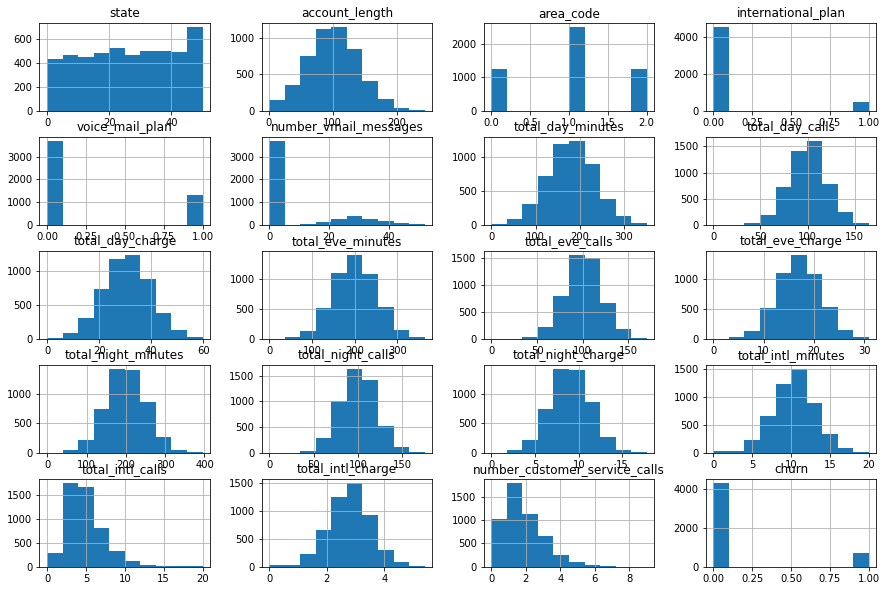

In [9]:
dfnew.hist(figsize=(15,10))

<AxesSubplot:>

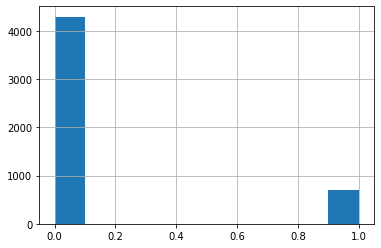

In [10]:
dfnew['churn'].hist()

In [13]:
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique (SMOTE)

In [19]:
c0 = dfnew[dfnew['churn']== 0]
c1 = dfnew[dfnew['churn']== 1]

x = dfnew.drop('churn', axis=1)
y = dfnew['churn']

In [25]:

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

x_smote.shape

(8586, 19)

In [27]:
y_smote.shape

(8586,)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

Accuracy = 0.95
Recall = 0.71

[[1068    8]
 [  50  124]]


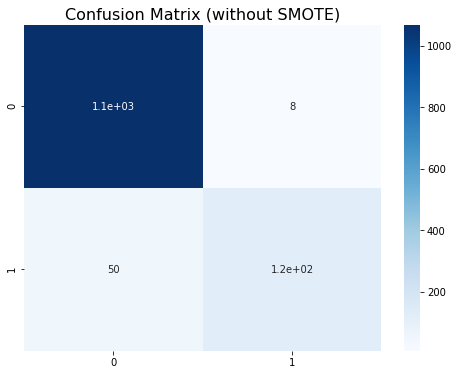

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)



model = RandomForestClassifier(random_state=42, class_weight= 'balanced')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
print(cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.94
Recall = 0.92

[[1029   36]
 [  87  995]]


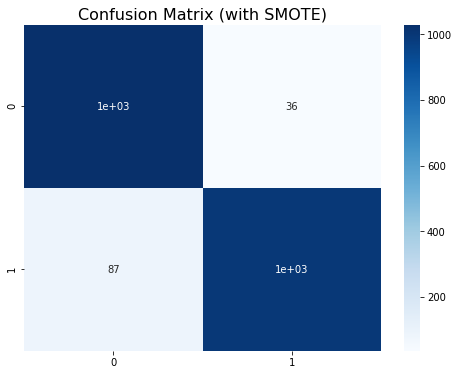

In [42]:

X_train, X_test, y_train, y_test = train_test_split(
    x_smote, y_smote, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
print(cm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');